# KNN From Scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import operator

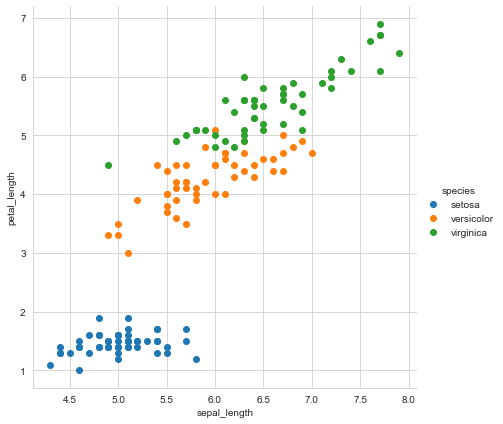

In [5]:
import seaborn as sns
 
iris = sns.load_dataset('iris')
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue ="species", height = 6).map(plt.scatter, 'sepal_length','petal_length').add_legend()

In [8]:
data = pd.DataFrame(iris)

In [72]:
data.shape

(150, 5)

In [9]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
col = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [14]:
def euclideanDistance(data1, data2, cols = col):
    
    # Get two data points
    point_1 = list(data1[col])
    point_2 = list(data2[col])
    
    # variable to store sum of squares
    sum_of_squares = 0
    
    # Loop for sum of squares
    for i in range(len(point_2)):
        sum_of_squares += (point_1[i] - point_2[i])**2
        
    return round(sum_of_squares ** 0.5, 3)

In [15]:
euclideanDistance(data.loc[0], data.loc[1])

0.539

In [16]:
data.shape[0]

150

In [22]:
def get_k_neighbours(data_1, data, k=50):
    
    # variable to maintain the k-neighbours
    k_neighbours = []
    # list of euclidean distances
    all_dists = []
    
    # loop to calculate distances from all points
    for i in range(data.shape[0]):
        data_2 = data.loc[i]
        all_dists.append({'dist': euclideanDistance(data_1, data_2), 'index': i, 'class': data_2['species']})
    
    # the sorted list in order of euclidean distances
    newlist = sorted(all_dists, key=operator.itemgetter('dist')) 
    # We select the k closest\
    k_neighbours = newlist[:k]
    return k_neighbours
    

In [40]:
def select_class(k_neighbours: list, classes = ['versicolor', 'setosa', 'virginica']):
    count_dict = {'virginica': 0, 'versicolor': 0, 'setosa': 0}
    for i in k_neighbours:
        count_dict[i['class']] += 1
    result_class = ''
    max_class = 0
    for iris_class in classes:
        if int(max_class) < int(count_dict[iris_class]):
            max_class = count_dict[iris_class]
            result_class = iris_class
    return result_class

In [75]:
def KNN(data):
    num_correct = 0
    pred_list = []
    for i in range(data.shape[0]):
        k_n = get_k_neighbours(data.loc[i], data)
        pred = select_class(k_n)
        pred_list.append(pred)
        if pred == data.loc[i]['species']:
            num_correct += 1
    data['pred'] = pred_list
    print(f"Number of correct guess: {num_correct}")

In [76]:
K_N = get_k_neighbours(data.loc[1], data)

In [77]:
select_class(K_N)

'setosa'

In [78]:
KNN(data)

Number of correct guess: 141


In [79]:
print(f"Accuracy of KNN Classifier: {141/150*100}")

Accuracy of KNN Classifier: 94.0


In [80]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,pred
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa


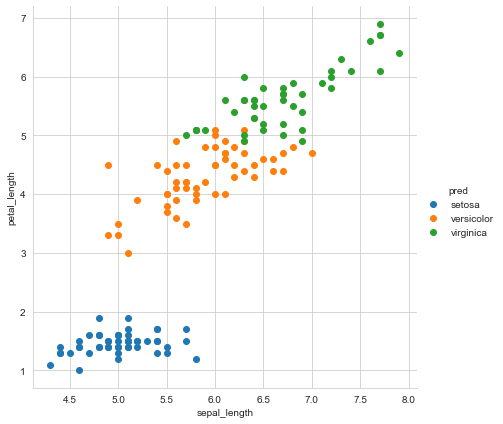

In [81]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue ="pred", height = 6).map(plt.scatter, 'sepal_length','petal_length').add_legend()

# Conclusion

KNN algorithm was studies and performed on the Iris Dataset